In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
with open('trainer_states_for_loss_plot/base_deberta.json') as f:
    base_deberta = json.load(f)
with open('trainer_states_for_loss_plot/visattn.json') as f:
    visattn = json.load(f)
with open('trainer_states_for_loss_plot/vlscore.json') as f:
    vlscore = json.load(f)
with open('trainer_states_for_loss_plot/vlscore_visattn.json') as f:
    vlscore_visattn = json.load(f)

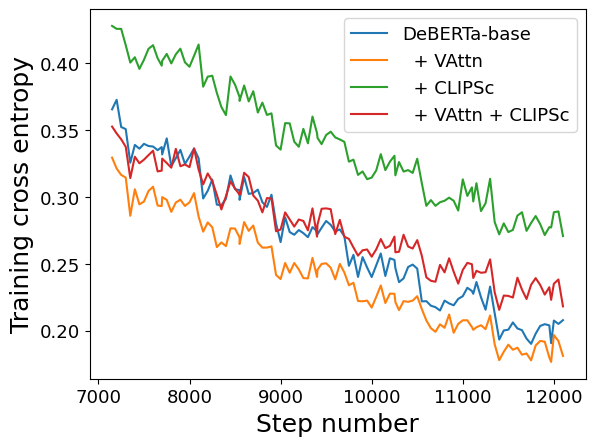

In [39]:
def loss_seq(states):
    return [x for x in [states['log_history'][i]['loss'] if 'loss' in states['log_history'][i] else None for i in range(len(states['log_history']))] if x is not None]

def step_count(states):
    return [x for x in [states['log_history'][i]['step'] if 'step' in states['log_history'][i] else None for i in range(len(states['log_history']))] if x is not None]

base_deberta_loss = loss_seq(base_deberta)
base_deberta_step = step_count(base_deberta)

visattn_loss = loss_seq(visattn)
visattn_step = step_count(visattn)

vlscore_loss = loss_seq(vlscore)
vlscore_step = step_count(vlscore)

vlscore_visattn_loss = loss_seq(vlscore_visattn)
vlscore_visattn_step = step_count(vlscore_visattn)

start = 150
end = min(map(len, [base_deberta_loss, visattn_loss, vlscore_loss, vlscore_visattn_loss]))

base_deberta_loss = base_deberta_loss[start:end]
base_deberta_step = base_deberta_step[start:end]

visattn_loss = visattn_loss[start:end]
visattn_step = visattn_step[start:end]

vlscore_loss = vlscore_loss[start:end]
vlscore_step = vlscore_step[start:end]

vlscore_visattn_loss = vlscore_visattn_loss[start:end]
vlscore_visattn_step = vlscore_visattn_step[start:end]

plt.rc('font', size=13)
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels

plt.plot(base_deberta_step, base_deberta_loss, label = "DeBERTa-base")
plt.plot(visattn_step, visattn_loss, label = "  + VAttn")
plt.plot(vlscore_step, vlscore_loss, label = "  + CLIPSc")
plt.plot(vlscore_visattn_step, vlscore_visattn_loss, label = "  + VAttn + CLIPSc")
plt.xlabel('Step number')
plt.ylabel('Training cross entropy')
plt.legend()
plt.savefig('loss.pdf', pad_inches=0, bbox_inches="tight") 
plt.show()